
# NB5. Information Cascades

## 1. Network Simulation

A. Simulate a Random Network with N = 50 and p = 5%. Make a visualization of the graph. Make sure your network is connected.

In [62]:
import random
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
%matplotlib inline

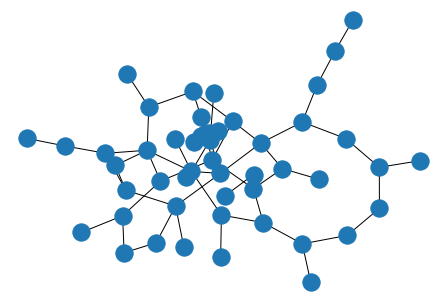

In [63]:
G = nx.erdos_renyi_graph(50, .05)


pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos = pos)

## 2. Fractional Threshold Model
1. Implement an algorithm to simulate the information spread using the fractional threshold model. Consider a synchronous implementation.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
    
    b) How much nodes are vulnerable nodes?
    
    c) Simulate the information spread with $\theta = \frac{1}{2}$ until no further nodes can be activate. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    d) Create an animation (GIF Image) showing the state of the graph at each step.  
    

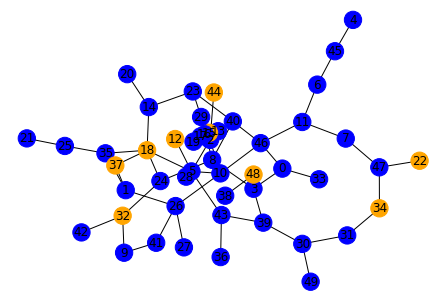

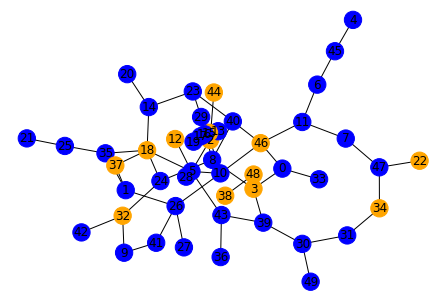

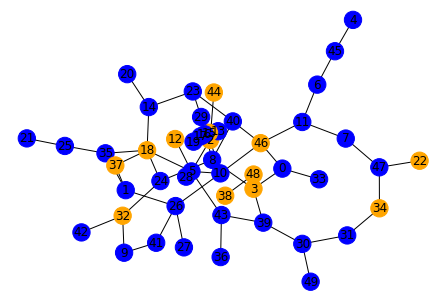

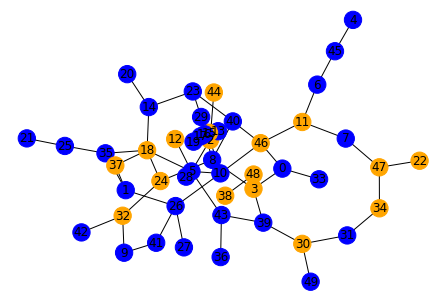

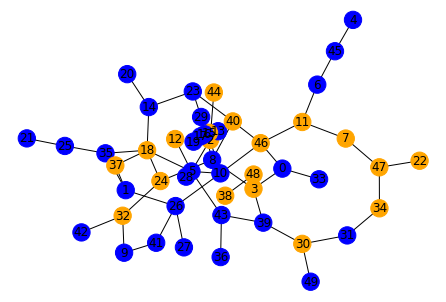

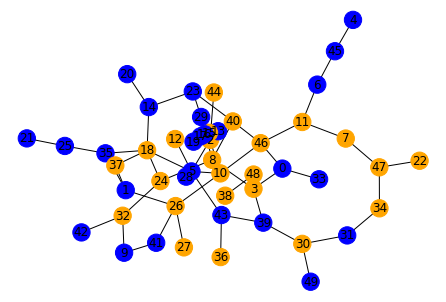

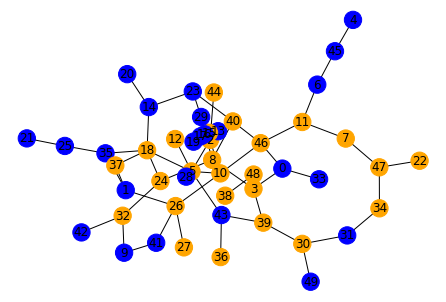

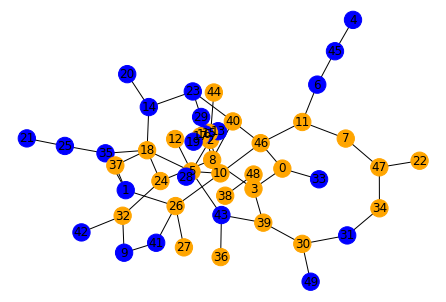

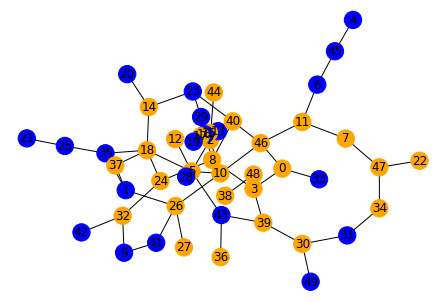

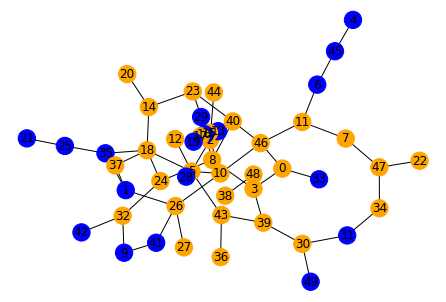

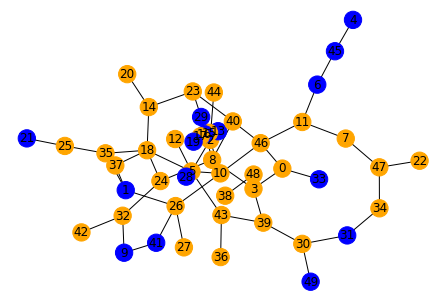

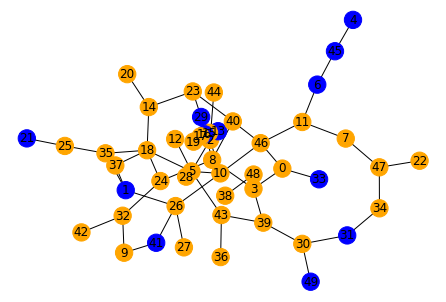

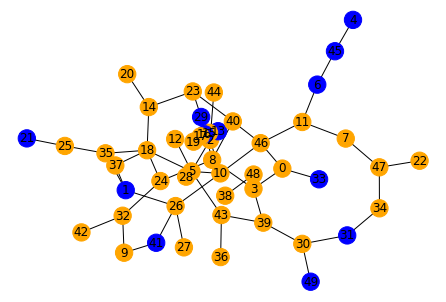

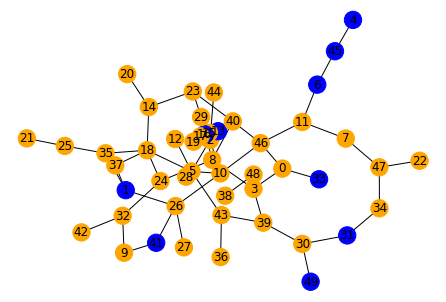

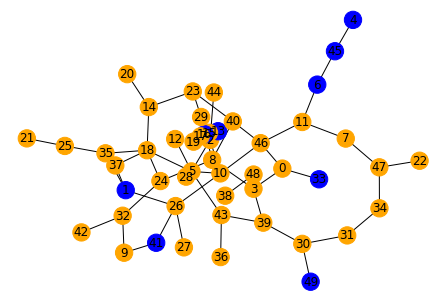

In [76]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'inactive'
    return state



def state_transition(G, current_state):
    P_ACTIVE = 0.1
    next_state = {}
    for node in G.nodes:
        if current_state[node] == 'inactive':
            if random.random() < P_ACTIVE:
                next_state[node] = 'active'
    return next_state


def run(G, steps=1):
    active_values = []
    inactive_values = []
    for i in range(steps):
        step(G)
        
        random_node_colors = ['orange' if node[1] == 'active' else 'blue' for node in G.nodes(data = 'state')]
        
        active_nodes = [1 if node[1] == 'active' else 0 for node in G.nodes(data = 'state')]
        inactive_nodes = [1 if node[1] == 'inactive' else 0 for node in G.nodes(data = 'state')]
        active_values.append(sum(active_nodes))
        inactive_values.append(sum(inactive_nodes))
        
        nx.draw(G, node_color=random_node_colors, pos = pos, with_labels=True)

        plt.savefig("threshold/Graph1_i"+str(i)+".png", format="PNG")
    
        plt.show()
        
    return active_values, inactive_values 
    
            
def step(G):
    state = nx.get_node_attributes(G, 'state')   
    new_state = state_transition(G, state)
    state.update(new_state)
    nx.set_node_attributes(G, state, 'state')
    


nx.set_node_attributes(G, initial_state(G), 'state')
active_list, inactive_list = run(G, steps = 15)


In [74]:
# Create gif

imgs = glob.glob("threshold/*.png")
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    
frames[0].save('graph_threshold.gif', format='GIF',
    append_images=frames[1:],
    save_all=True,
    duration=300, loop=0)
    


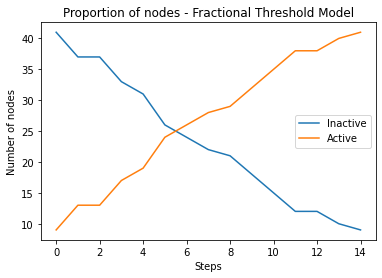

In [85]:
plt.title("Proportion of nodes - Fractional Threshold Model")

plt.plot(list(range(0, len(active_list))), inactive_list, label='Inactive')
plt.plot(list(range(0, len(active_list))), active_list, label='Active')
plt.ylabel("Number of nodes")
plt.xlabel("Steps")
plt.legend()
plt.show()

## 3. Independent Cascade Model

1. Implement an algorithm to simulate the information spread using the a independent cascade model.
2. Complete the following considering a copy of the network at the section 1:
    
    a) Initialize as 'Active' a random sample with 10% of the total network. The rest of the network will be initialized as 'Inactive'.
        
    b) Simulate the information until no further nodes can be activate. Consider that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network. Plot the proportion of nodes in each state ('Active' and 'Inactive') at each step of the simulation.
    
    c) Create an animation (GIF Image) showing the state of the graph at each step. 

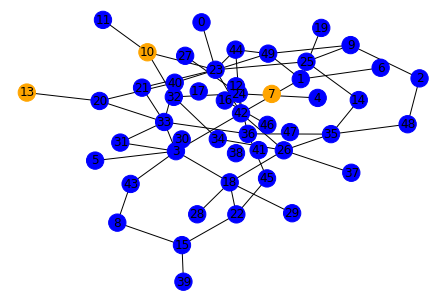

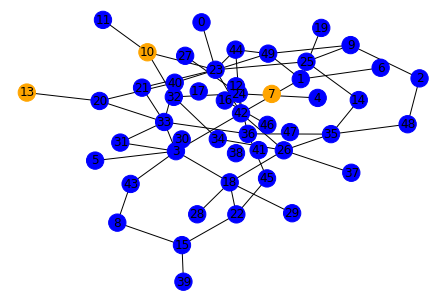

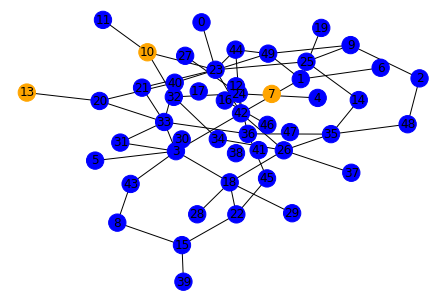

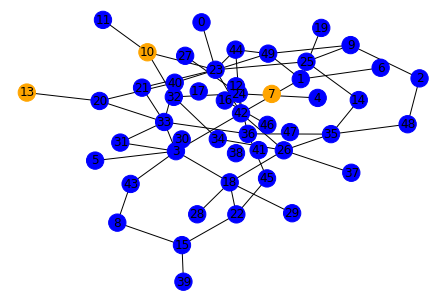

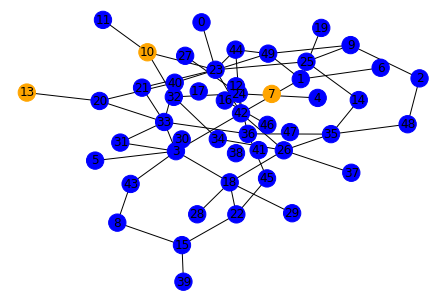

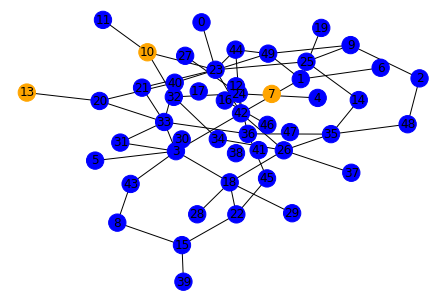

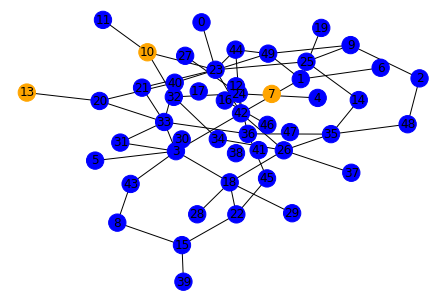

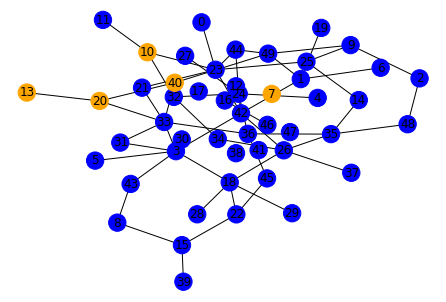

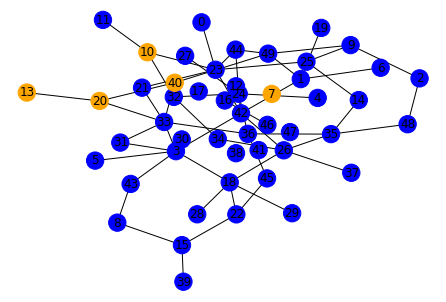

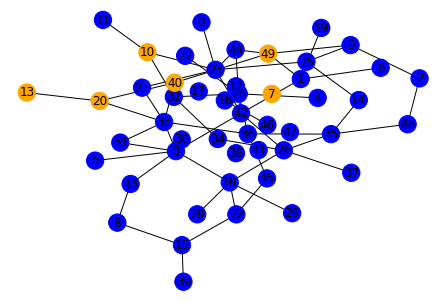

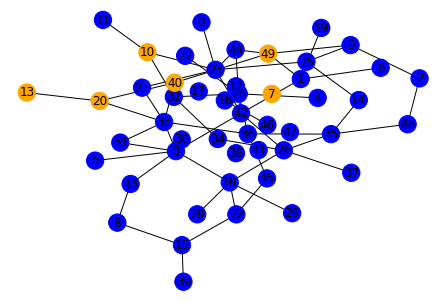

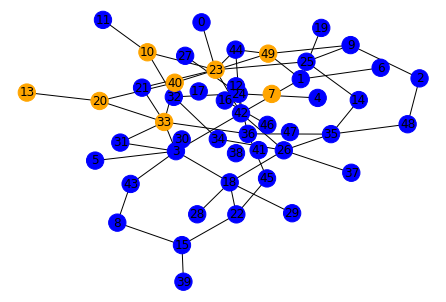

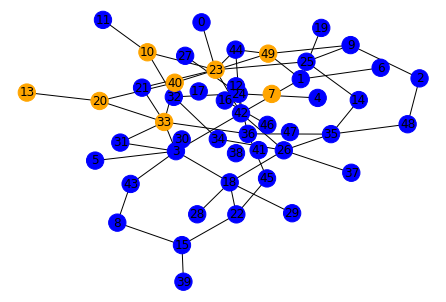

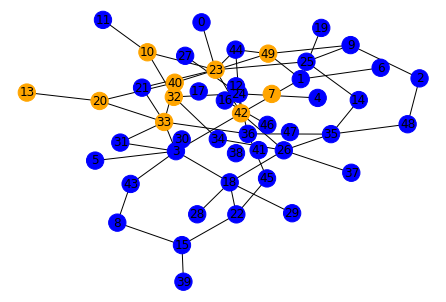

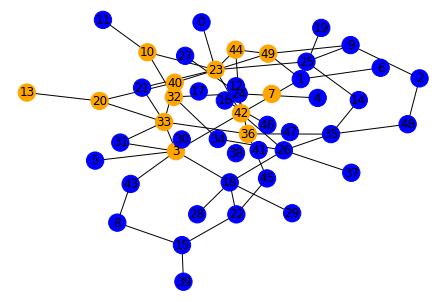

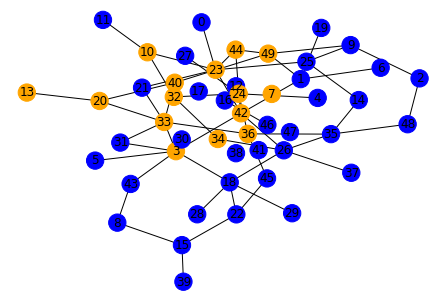

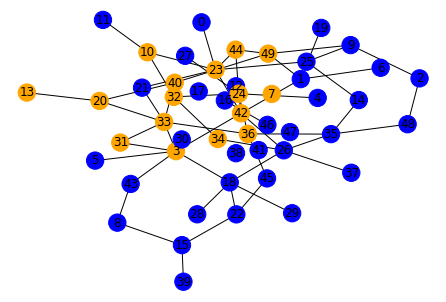

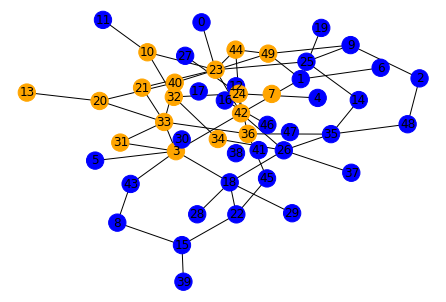

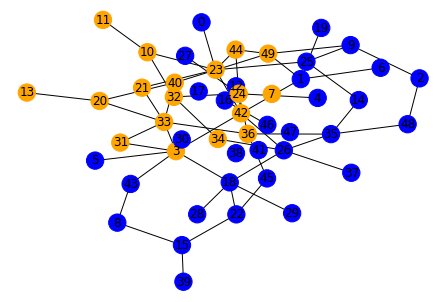

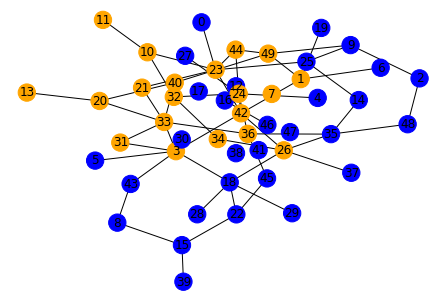

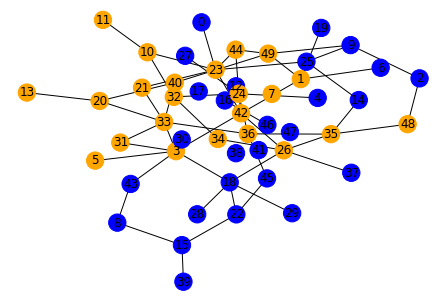

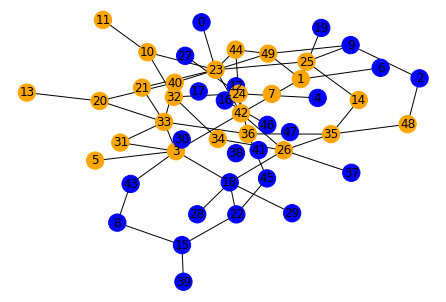

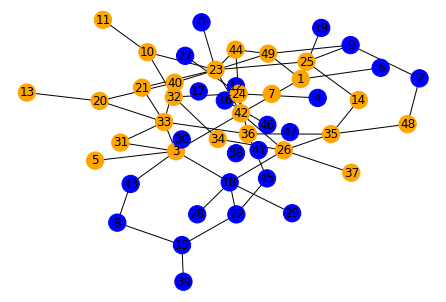

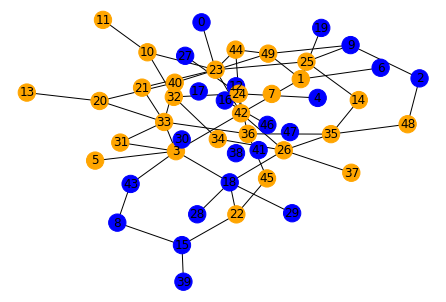

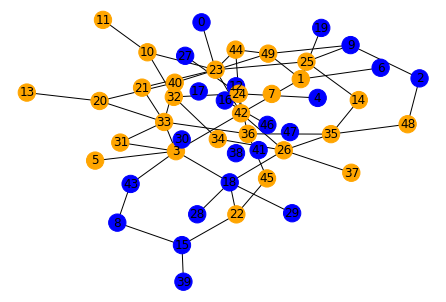

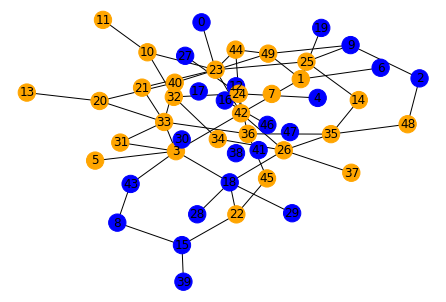

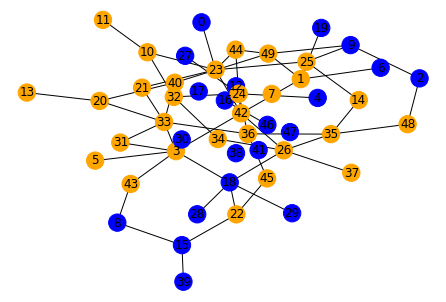

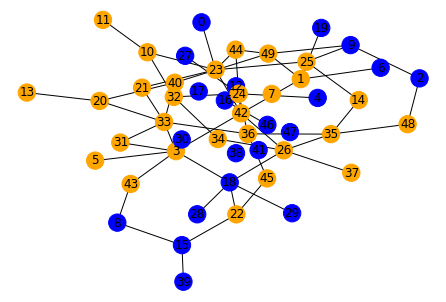

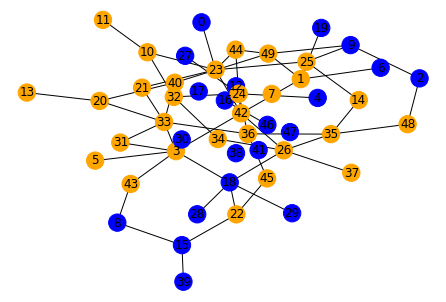

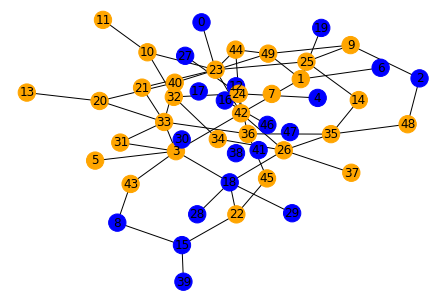

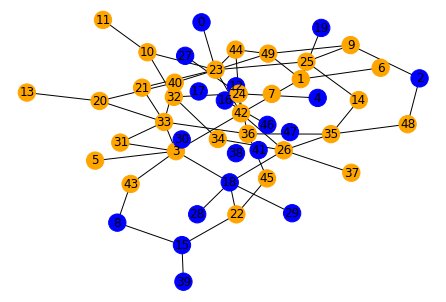

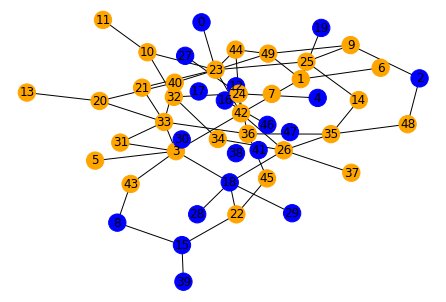

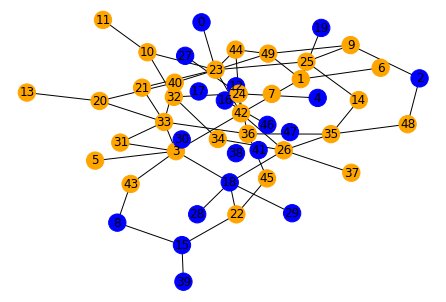

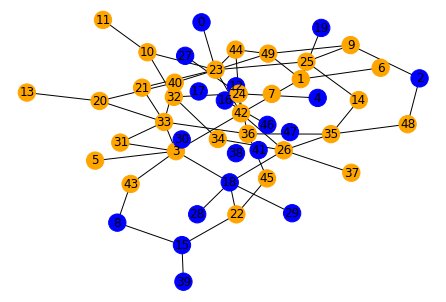

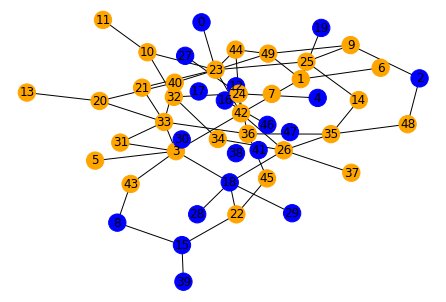

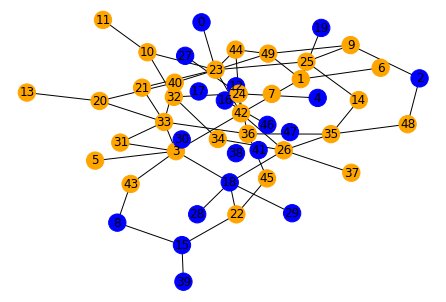

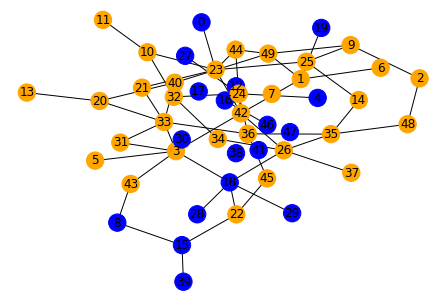

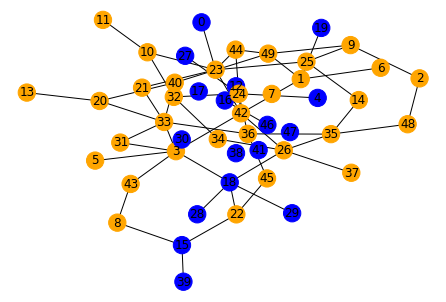

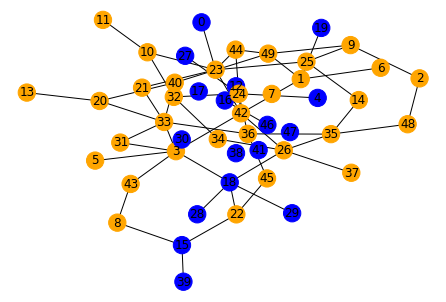

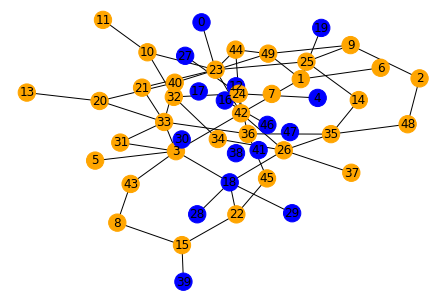

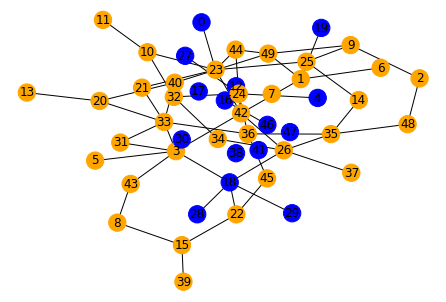

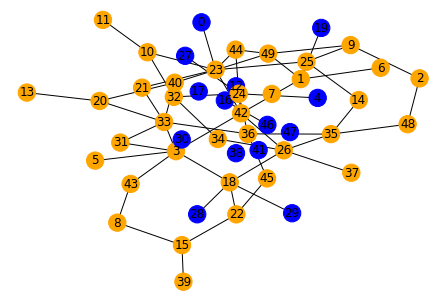

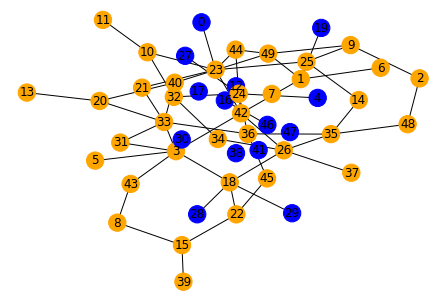

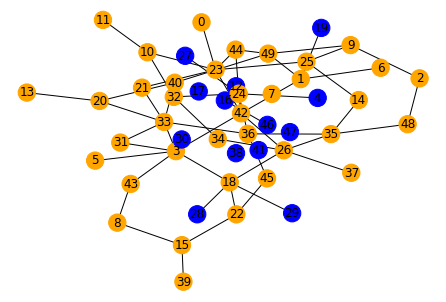

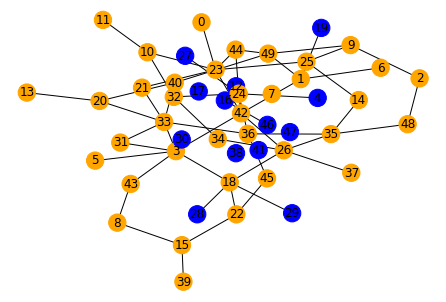

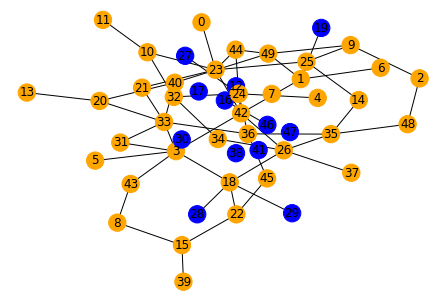

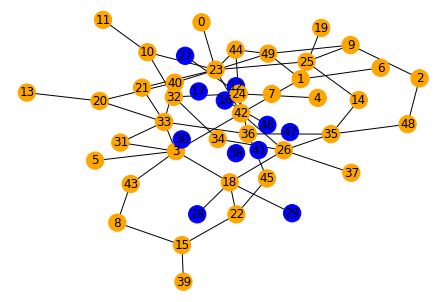

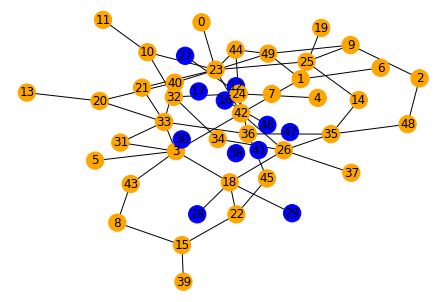

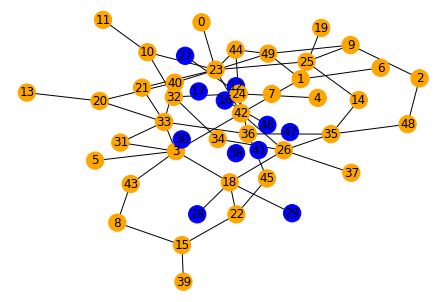

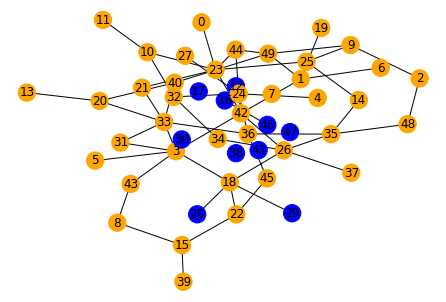

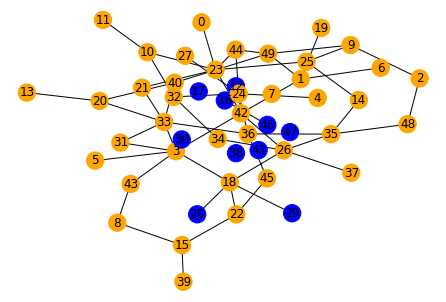

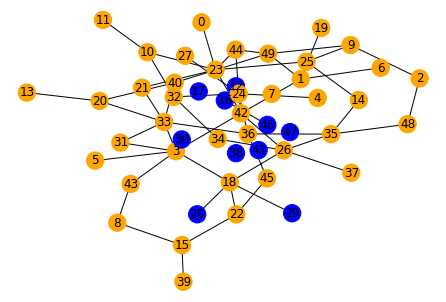

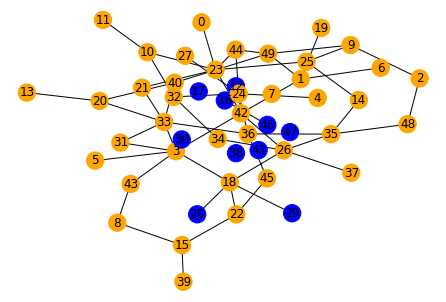

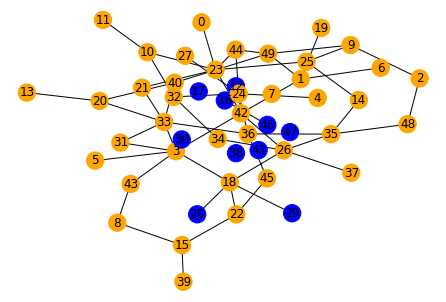

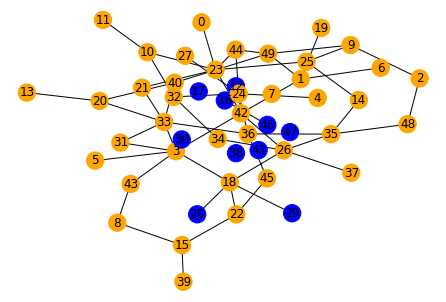

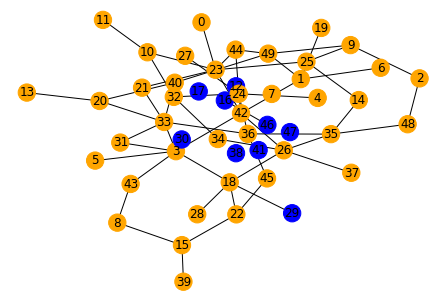

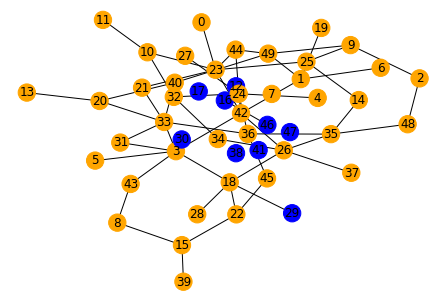

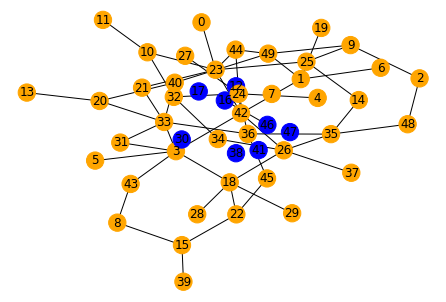

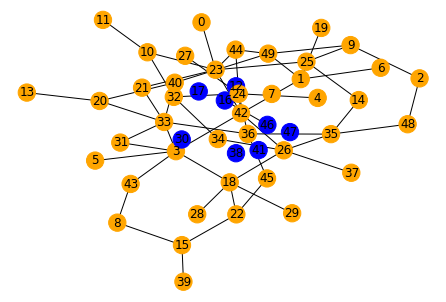

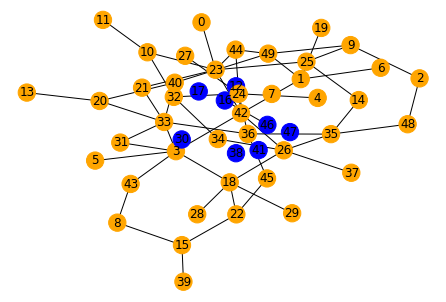

In [86]:
def initial_state(G):
    state = {}
    for node in G.nodes:
        state[node] = 'inactive'
    return state



def independent_cascade_model(G, current_state):
    P_ACTIVE = .05
    next_state = {}
    spread = {}
    
    if 'active' not in list(current_state.values()):
        seeds = random.sample(range(0, len(list(G.nodes)) ), 3)
        
        for node in seeds:
            current_state[node] = 'active'
            
    activated_nodes = [k for k, v in current_state.items() if v == 'active'] 
    
    updated = True
    while updated:
        updated = False
        
        for node in activated_nodes:
            
            if current_state[node] == 'inactive':
                next_state[node] = 'active'
                
            neighbors = [n for n in G.neighbors(node)]
            spread[node] = 0
            for N in neighbors:
                if current_state[N] == 'inactive':
                    if random.random() < P_ACTIVE:
                        next_state[N] = 'active'
                        activated_nodes.append(N)
                        spread[node] += 1
    return next_state, spread



def run(G, steps=1):
    active_values = []
    inactive_values = []
    for i in range(steps):
        step(G)
        
        random_node_colors = ['orange' if node[1] == 'active' else 'blue' for node in G.nodes(data = 'state')]
        
        active_nodes = [1 if node[1] == 'active' else 0 for node in G.nodes(data = 'state')]
        inactive_nodes = [1 if node[1] == 'inactive' else 0 for node in G.nodes(data = 'state')]
        active_values.append(sum(active_nodes))
        inactive_values.append(sum(inactive_nodes))
        
        nx.draw(G, node_color=random_node_colors, pos = pos, with_labels=True)
    
        plt.savefig("cascade/Graph2_"+str(i)+".png", format="PNG")
        
        plt.show()
        
    return active_values, inactive_values 
            
def step(G):
    state = nx.get_node_attributes(G, 'state')
    new_state, spread = independent_cascade_model(G, state)
    state.update(new_state)
    nx.set_node_attributes(G, state, 'state')
    
    
G = nx.erdos_renyi_graph(50, .05)
pos = nx.kamada_kawai_layout(G)
nx.set_node_attributes(G, initial_state(G), 'state')

active_list, inactive_list = run(G, steps = 60)




In [87]:
# Create gif

imgs = glob.glob("cascade/*.png")
frames = []
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
    
frames[0].save('graph_cascade.gif', format='GIF',
    append_images=frames[1:],
    save_all=True,
    duration=300, loop=0)

In [88]:
plt.title("Proportion of nodes - Independent Cascade Model")

plt.plot(list(range(0, len(active_list))), inactive_list, label='Inactive')
plt.plot(list(range(0, len(active_list))), active_list, label='Active')
plt.ylabel("Number of nodes")
plt.xlabel("Steps")
plt.legend()
plt.show()

## 4. Maximazing the Information Spread

1. Implement the algorithm to find the set S with size k that maximize the information spread based on the Greedy Algorithm proposed by Kempe (2003). 
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account that the probability $P_{v,w}$, i. e. probability that node w gets activated due to v, is given by a constant P = 0.5 for any node in the network.

In [49]:
G = nx.erdos_renyi_graph(50, .05)
pos = nx.kamada_kawai_layout(G)
nx.set_node_attributes(G, initial_state(G), 'state')

             
def greedy(G, k):
    S = []
    best_spread = 1
    
    while len(S) != k:
        
        state = nx.get_node_attributes(G, 'state')
        new_state, spread = independent_cascade_model(G, state)
        state.update(new_state)
        nx.set_node_attributes(G, state, 'state')
        
        for key, v in spread.items():
                if v >= best_spread:
                    if key not in S:
                        S.append(key)
                        best_spread = v 
                
                if len(S) == k:
                    return S
       
    return S
        
            
greedy(G, 10)
        

[37, 6, 5, 38, 17, 47, 40, 19, 26, 46]

## 5. Wrapping all together

1. Simulate an Erdos-Renyi and a Barabasi-Albert Network with 50 nodes and 150 nodes. Make a visualization of each network.
2. Find the set S with size k = 10 that maximize the influence for each Network taking into account the following hypotesis:
    * Hypotesis 1: The probability $P_{v,w}$, i. e. probability that node w gets activated due to w, is given by a constant P = 0.5 for any node in the network.
    * Hypotesis 2: Now, take into account that $P_{v,w}$ is given by the Node Similarity. Let $N(v_v)$ and $N(v_w)$ be the neighbors of vertices $v_v$ and $v_w$, respectively. The Jaccard Node Similarity between both nodes is given by:
$$\sigma_{Jaccard}(v_v, v_w) = \frac{|N(v_v) \cap N(v_w)|}{|N(v_v) \cup N(v_w)|}$$


In general, the definition of neighborhood $N(v_i)$ excludes the node itself $(v_i)$. This, however, leads to problems with similarity values because nodes that are connected and do not share a neighbor will be assigned zero similarity. This can be rectified by assuming that nodes are included in their own neighborhood.

> Note: You need to complete one simulation per hypotesis. 

## 6. Networks Avalanches

Generate a random network with the Erdős-Rényi G(N,p) model and a scale-free network with the configuration model, with $N = 10^3$ nodes and average degree $〈k〉 = 2$. Assume that on each node there is a bucket which can hold as many sand grains as the node degree. Simulate then the following process:

1. At each time step add a grain to a randomly chosen node i.
    
2. If the number of grains at node i reaches or exceeds its bucket size, then it becomes unstable and all the grains at the node topple to the buckets of its adjacent nodes.
    
3. If this toppling causes any of the adjacent nodes' buckets to be unstable, subsequent topplings follow on those nodes, until there is no unstable bucket left. We call this sequence of toppings an avalanche, its size $s$ being equal to the number of nodes that turned unstable following an initial perturbation (adding one grain).

Repeat (1)-(3) $10^4$ times. Assume that at each time step a fraction $10^{–4}$ of sand grains is lost in the transfer, so that the network buckets do not become saturated with sand. Study the avalanche distribution P(s).
    
**Suggested Reading**
* Barabasi. Network Science. Network Robustness ([Link](http://networksciencebook.com/chapter/8))